## Import Libraries

In [1]:
## data libraries
import numpy as np
import pandas as pd

## visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="whitegrid", )

## Model building libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import impute
from sklearn.linear_model import LinearRegression
from sklearn import tree

from xgboost import XGBRegressor

## Import Dataset

In [2]:
df = pd.read_csv('banglore.csv')

In [3]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## Data Preprocessing

In [6]:
## drop society column

df1 = df.drop(columns='society', axis = 1)

In [7]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
## Handle missing values

df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
## balcony does not have outliers, so fillna with mean

df1['balcony'] = df1['balcony'].fillna(df1['balcony'].mean())

In [10]:
## bath has outliers, so fillna with median

df1['bath'] = df1['bath'].fillna(df1['bath'].median())

In [11]:
## location has only 1 missing value, so delete row

df1.loc[df1['location'].isna()]

df1 = df1.drop(labels=[568], axis=0)

In [12]:
## size has only 16 missing values, so delete the rows

df1 = df1.drop(labels= df1.loc[df1['size'].isna()].index.tolist(), axis = 0)

In [13]:
## check if any more missing values

df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [14]:
## analyze the area_type column

df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [15]:
df1['area_type'].value_counts()

Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [16]:
## analyze the availability column

df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [17]:
## categorize all other values as 'Not Ready' 

def modify_availability(x):
    try:
        if(x != 'Ready To Move'):
            x = 'Not Ready'
    except:
        return x
    return x

df1['availability'] = df1['availability'].apply(modify_availability)

In [18]:
## anayze location column

## no. of locations which are less that 10
location_stats = df['location'].value_counts()
other_loc = location_stats[location_stats <= 10]

print(other_loc)

Naganathapura                           10
1st Block Koramangala                   10
Gunjur Palya                            10
Basapura                                10
Dairy Circle                            10
                                        ..
Housing Board Layout Vijay Nagar         1
Marathi Layout                           1
RMV extension stage 2, rmv extension     1
Banashankari Stage I                     1
Maheswari Nagar                          1
Name: location, Length: 1064, dtype: int64


In [19]:
## categorize all locations with count < 10 as 'Others'

df1['location'] = df1['location'].apply(lambda x : 'Other' if x in other_loc else x)

df1['location'].value_counts()

Other                        2897
Whitefield                    539
Sarjapur  Road                397
Electronic City               302
Kanakpura Road                273
                             ... 
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
Tindlu                         11
Narayanapura                   11
Nehru Nagar                    11
Name: location, Length: 242, dtype: int64

In [20]:
len(df1['location'].unique())

242

In [21]:
## analyze the size column

df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df1['size'] = df1['size'].apply(lambda x : x.split(' ')[0])

In [23]:
# coverting datatype of size column to float

df1['size'] = df1['size'].astype(float)

In [24]:
## analyze the total_sqft column

df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
## covert the range sqft to mean of the range

import re
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if(len(tokens) == 2):
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return float(re.findall(r'\d+', x)[0])

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)

In [26]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
size,13303.0,2.803728,1.295022,1.0,2.0,3.0,3.0,43.0
total_sqft,13303.0,1555.151863,1238.974621,1.0,1100.0,1275.0,1676.5,52272.0
bath,13303.0,2.689619,1.339393,1.0,2.0,2.0,3.0,40.0
balcony,13303.0,1.584344,0.798862,0.0,1.0,2.0,2.0,3.0
price,13303.0,112.584033,148.993820,8.0,50.0,72.0,120.0,3600.0


## Outlier Detection and Removal

In [28]:
# rename size column to bhk

df2 = df1.rename(columns={'size':'bhk'}, inplace=False)

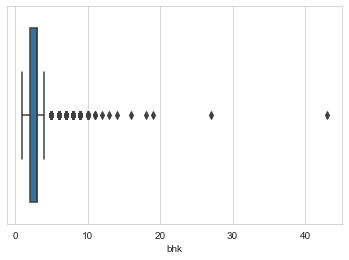

In [29]:
# checking outliers in size column

sns.boxplot(x = df2['bhk'])

In [30]:
df2['bhk'].value_counts()

2.0     5528
3.0     4856
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
18.0       1
14.0       1
12.0       1
43.0       1
19.0       1
13.0       1
16.0       1
Name: bhk, dtype: int64

In [31]:
df2[(df2['bhk']>10)]

,area_type,availability,location,bhk,total_sqft,bath,balcony,price
459,Super built-up Area,Ready To Move,Other,11.0,5000.0,9.0,3.000000,360.0
1718,Super built-up Area,Ready To Move,Other,27.0,8000.0,27.0,0.000000,230.0
1768,Plot Area,Ready To Move,Other,11.0,1200.0,11.0,0.000000,170.0
3379,Super built-up Area,Ready To Move,Other,19.0,2000.0,16.0,1.584376,490.0
3609,Super built-up Area,Ready To Move,Other,16.0,10000.0,16.0,1.584376,550.0
3853,Plot Area,Ready To Move,Other,11.0,1200.0,6.0,3.000000,150.0
4684,Plot Area,Ready To Move,Munnekollal,43.0,2400.0,40.0,0.000000,660.0
4916,Super built-up Area,Ready To Move,Other,14.0,1250.0,15.0,0.000000,125.0
6533,Plot Area,Ready To Move,Mysore Road,12.0,2232.0,6.0,2.000000,300.0
7979,Super built-up Area,Ready To Move,Other,11.0,6000.0,12.0,1.584376,150.0


In [32]:
## since there are outliers, we will remove records that have size greater that Q3+1.5IQR

df3 = df2.drop(labels= df2.loc[df2['bhk'] > 10].index.tolist(), axis = 0)

In [33]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,13291.0,2.790761,1.191110,1.0,2.0,3.0,3.0,10.0
total_sqft,13291.0,1553.101966,1234.626911,1.0,1100.0,1275.0,1675.0,52272.0
bath,13291.0,2.677827,1.251469,1.0,2.0,2.0,3.0,14.0
balcony,13291.0,1.584696,0.798435,0.0,1.0,2.0,2.0,3.0
price,13291.0,112.410307,148.863001,8.0,50.0,72.0,120.0,3600.0


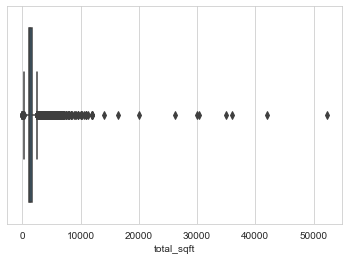

In [34]:
## checking outliers in total_sqft

sns.boxplot(x = df3['total_sqft'])

In [35]:
## remove rows with total_sqft less than 500

df4 = df3.drop(labels= df3.loc[df3['total_sqft'] < 500].index.tolist(), axis = 0)

In [36]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,13137.0,2.802466,1.185145,1.0,2.0,3.0,3.0,10.0
total_sqft,13137.0,1567.439287,1234.555079,500.0,1100.0,1280.0,1680.0,52272.0
bath,13137.0,2.688742,1.247478,1.0,2.0,2.0,3.0,14.0
balcony,13137.0,1.592058,0.796175,0.0,1.0,2.0,2.0,3.0
price,13137.0,113.033934,149.291502,10.5,50.0,72.0,120.0,3600.0


In [37]:
## create new feature sqft_per_bedroom

df4['sqft_per_bedroom'] = df4['total_sqft']/df4['bhk']

df4['sqft_per_bedroom'].describe().T

count    13137.000000
mean       576.755196
std        388.431731
min         66.666667
25%        475.333333
50%        554.000000
75%        625.500000
max      26136.000000
Name: sqft_per_bedroom, dtype: float64

In [38]:
## remove rows with sqft_per_bedroom less than 300

df5 = df4.drop(labels= df4.loc[df4['sqft_per_bedroom'] < 300].index.tolist(), axis = 0)

In [39]:
## remove rows with sqft_per_bedroom greater than 1500

df6 = df5.drop(labels= df5.loc[df5['sqft_per_bedroom'] > 1500].index.tolist(), axis = 0)

In [40]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,12350.0,2.654332,0.947370,1.0,2.000000,3.0,3.0,10.0
total_sqft,12350.0,1545.234406,780.611991,500.0,1120.000000,1300.0,1700.0,12000.0
bath,12350.0,2.558947,1.048140,1.0,2.000000,2.0,3.0,14.0
balcony,12350.0,1.592652,0.790879,0.0,1.000000,2.0,2.0,3.0
price,12350.0,106.901325,125.063068,10.5,49.500000,70.0,115.0,3600.0
sqft_per_bedroom,12350.0,581.553103,158.074863,300.0,493.333333,562.5,630.0,1500.0


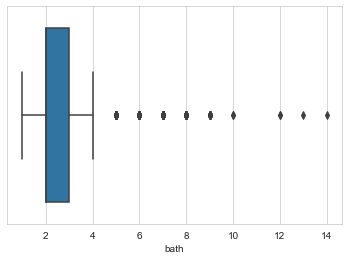

In [41]:
## checking outliers in bath

sns.boxplot(x = df6['bath'])

In [42]:
df6['bath'].value_counts()

2.0     6871
3.0     3157
4.0     1014
1.0      660
5.0      393
6.0      161
7.0       47
8.0       26
9.0       15
10.0       2
12.0       2
13.0       1
14.0       1
Name: bath, dtype: int64

In [43]:
## removing rows where no. of bath are 2 greater than no. of bedrooms

df7 = df6.drop(df6.loc[df6['bath'] > df6['bhk'] + 2].index.tolist(), axis = 0)

In [44]:
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,12343.0,2.652759,0.943198,1.0,2.000000,3.0,3.0,10.0
total_sqft,12343.0,1543.763989,776.698678,500.0,1120.000000,1300.0,1699.0,12000.0
bath,12343.0,2.555376,1.035111,1.0,2.000000,2.0,3.0,12.0
balcony,12343.0,1.592441,0.790976,0.0,1.000000,2.0,2.0,3.0
price,12343.0,106.202735,117.908956,10.5,49.500000,70.0,115.0,2800.0
sqft_per_bedroom,12343.0,581.422236,157.808599,300.0,493.333333,562.5,630.0,1500.0


In [45]:
## creating new feature price_per_sqft

df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']

df7['price_per_sqft'].describe()

count    12343.000000
mean      6257.469758
std       3745.246719
min        500.000000
25%       4219.169662
50%       5292.633015
75%       6896.551724
max      76923.076923
Name: price_per_sqft, dtype: float64

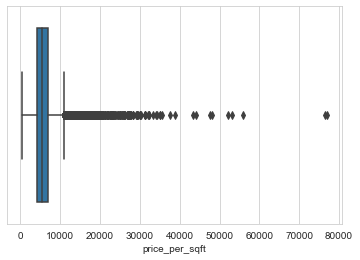

In [46]:
sns.boxplot(x=df7['price_per_sqft'])

In [47]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df7.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df8 = remove_pps_outliers(df7)
print(len(df8), len(df7))

10082 12343


In [48]:
df8.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price,sqft_per_bedroom,price_per_sqft
0,Super built-up Area,Not Ready,Devarachikkanahalli,3.0,1250.0,2.0,3.0,44.0,416.666667,3520.000000
1,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,1250.0,2.0,2.0,40.0,625.000000,3200.000000
2,Plot Area,Ready To Move,Devarachikkanahalli,2.0,1200.0,2.0,2.0,83.0,600.000000,6916.666667
3,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,1170.0,2.0,2.0,40.0,585.000000,3418.803419
4,Super built-up Area,Ready To Move,Devarachikkanahalli,3.0,1425.0,2.0,2.0,65.0,475.000000,4561.403509


In [49]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df9 = remove_bhk_outliers(df8)
print(len(df8), len(df9))

10082 7231


In [50]:
## Rremoving the columns

df10 = df9.drop(columns=['sqft_per_bedroom','price_per_sqft'], axis=1)

In [51]:
df10.shape

(7231, 8)

## Handle Categorical Features

In [52]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df10.location).drop('Other', axis='columns')
df10 = pd.concat([df10,dummy_cols], axis='columns')

In [53]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df10.availability).drop('Not Ready', axis='columns')
df10 = pd.concat([df10,dummy_cols], axis='columns')

In [54]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df10.area_type).drop('Super built-up  Area', axis='columns')
df10 = pd.concat([df10,dummy_cols], axis='columns')

In [55]:
df10.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
1,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,1250.0,2.0,2.0,40.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,Plot Area,Ready To Move,Devarachikkanahalli,2.0,1200.0,2.0,2.0,83.0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,1170.0,2.0,2.0,40.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,3.0,1425.0,2.0,2.0,65.0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,947.0,2.0,2.0,43.0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df11 = df10.drop(columns=['area_type', 'availability', 'location'], axis=1)

In [57]:
df11.shape

(7231, 250)

## Splitting into dependent and independent arrays

In [58]:
X = df11.drop(columns=['price']).values
y = df11['price'].values

In [59]:
print(X)

[[2.000e+00 1.250e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 1.200e+03 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 1.170e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [3.000e+00 1.692e+03 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.000e+00 2.500e+03 5.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 1.855e+03 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [60]:
print(y)

[ 40.  83.  40. ... 108. 185. 135.]


## Model Building

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Linear Regression

In [62]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = regressor.predict(X_test)

In [64]:
print(y_pred)

[ 42.58143362   2.04427933  41.47523077 ... 110.35990019 175.93589053
 106.33095224]


In [65]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8698446254620412

### XGBoost

xgr = XGBRegressor(n_estimators=100, max_depth=2, eta=.1)
xgr.fit(X_train, y_train)

y_pred = xgr.predict(X_test)

r2_score(y_test, y_pred)

from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'eta': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 500]}

xgb_grid = GridSearchCV(xgr,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)